<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [4]:
import numpy as np

def sum_prod(X, V):
    '''
    X - список матриц (n x n)
    V - список векторов (n x 1)
    Возвращает сумму X[0] @ V[0] + X[1] @ V[1] + ... + X[k] @ V[k]
    '''
    result = np.zeros_like(V[0], dtype=np.float64)  # создаём вектор нулей с типом float64
    
    for matrix, vector in zip(X, V):
        result += matrix @ vector  # матричное умножение и суммирование
    
    return result


def test_sum_prod():
    # Пример 1: две 2x2 матрицы и два вектора 2x1
    X = [
        np.array([[1, 2], [3, 4]]),
        np.array([[0, 1], [1, 0]])
    ]
    V = [
        np.array([[1], [0]]),
        np.array([[2], [3]])
    ]
    # Ожидаем:
    # X[0] @ V[0] = [[1], [3]]
    # X[1] @ V[1] = [[3], [2]]
    # Сумма = [[4], [5]]
    assert np.array_equal(sum_prod(X, V), np.array([[4], [5]]))

    # Пример 2: одна 3x3 матрица и один вектор
    X = [np.eye(3)]
    V = [np.array([[1], [2], [3]])]
    assert np.array_equal(sum_prod(X, V), np.array([[1], [2], [3]]))

    print("Все тесты пройдены")

test_sum_prod()

Все тесты пройдены


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [6]:
import numpy as np

def binarize(M, threshold=0.5):
    '''
    M - входная матрица (двумерный массив)
    threshold - порог, по которому происходит бинаризация
    Возвращает матрицу, в которой элементы > threshold заменены на 1, остальные на 0
    '''
    return (M > threshold).astype(int)  # сравниваем все элементы с threshold и преобразуем в 1 и 0


def test_binarize():
    # Тест 1: стандартный случай
    M = np.array([[0.1, 0.6], [0.7, 0.4]])
    result = binarize(M, threshold=0.5)
    expected = np.array([[0, 1], [1, 0]])
    assert np.array_equal(result, expected), f"Тест 1 не пройден. Результат: {result}"

    # Тест 2: все элементы больше порога
    M = np.array([[0.6, 0.7], [0.8, 0.9]])
    result = binarize(M, threshold=0.5)
    expected = np.array([[1, 1], [1, 1]])
    assert np.array_equal(result, expected), f"Тест 2 не пройден. Результат: {result}"

    # Тест 3: все элементы меньше порога
    M = np.array([[0.1, 0.2], [0.3, 0.4]])
    result = binarize(M, threshold=0.5)
    expected = np.array([[0, 0], [0, 0]])
    assert np.array_equal(result, expected), f"Тест 3 не пройден. Результат: {result}"

    # Тест 4: порог 0, проверяем, что все элементы больше 0 становятся 1
    M = np.array([[0, 0.1], [0.2, 0.3]])
    result = binarize(M, threshold=0)
    expected = np.array([[0, 1], [1, 1]])  # исправляем ожидаемое значение
    assert np.array_equal(result, expected), f"Тест 4 не пройден. Результат: {result}"

    # Тест 5: порог больше максимального значения в матрице, все элементы станут 0
    M = np.array([[0.1, 0.2], [0.3, 0.4]])
    result = binarize(M, threshold=1)
    expected = np.array([[0, 0], [0, 0]])
    assert np.array_equal(result, expected), f"Тест 5 не пройден. Результат: {result}"

    print("Все тесты пройдены")

# Запускаем тесты
test_binarize()


Все тесты пройдены


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [8]:
import numpy as np

def unique_rows(mat):
    """
    Функция для получения уникальных элементов из каждой строки матрицы.
    
    mat - матрица (2D numpy array)
    """
    return np.array([np.unique(row) for row in mat])

def unique_columns(mat):
    """
    Функция для получения уникальных элементов из каждого столбца матрицы.
    
    mat - матрица (2D numpy array)
    """
    return np.array([np.unique(col) for col in mat.T])  # Транспонируем матрицу для работы со столбцами

def test_unique():
    # Тест 1: стандартная матрица
    mat = np.array([[1, 2, 3], [4, 2, 3], [1, 5, 6]])
    
    result_rows = unique_rows(mat)
    expected_rows = np.array([[1, 2, 3], [2, 3, 4], [1, 5, 6]])
    assert np.array_equal(result_rows, expected_rows), f"Тест 1 не пройден. Результат: {result_rows}"

    result_cols = unique_columns(mat)
    expected_cols = np.array([[1, 4], [2, 5], [3, 6]])  # Исправленный ожидаемый результат
    assert np.array_equal(result_cols, expected_cols), f"Тест 2 не пройден. Результат: {result_cols}"

    # Тест 2: матрица с одинаковыми значениями
    mat = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    
    result_rows = unique_rows(mat)
    expected_rows = np.array([[1], [1], [1]])
    assert np.array_equal(result_rows, expected_rows), f"Тест 3 не пройден. Результат: {result_rows}"

    result_cols = unique_columns(mat)
    expected_cols = np.array([[1], [1], [1]])  # Все столбцы одинаковы
    assert np.array_equal(result_cols, expected_cols), f"Тест 4 не пройден. Результат: {result_cols}"

    # Тест 3: матрица с разными значениями в строках и столбцах
    mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    
    result_rows = unique_rows(mat)
    expected_rows = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Все строки уникальны
    assert np.array_equal(result_rows, expected_rows), f"Тест 5 не пройден. Результат: {result_rows}"

    result_cols = unique_columns(mat)
    expected_cols = np.array([[1, 4, 7], [2, 5, 8], [3, 6, 9]])  # Все столбцы уникальны
    assert np.array_equal(result_cols, expected_cols), f"Тест 6 не пройден. Результат: {result_cols}"

    print("Все тесты пройдены")

# Запускаем тесты
test_unique()


Все тесты пройдены


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

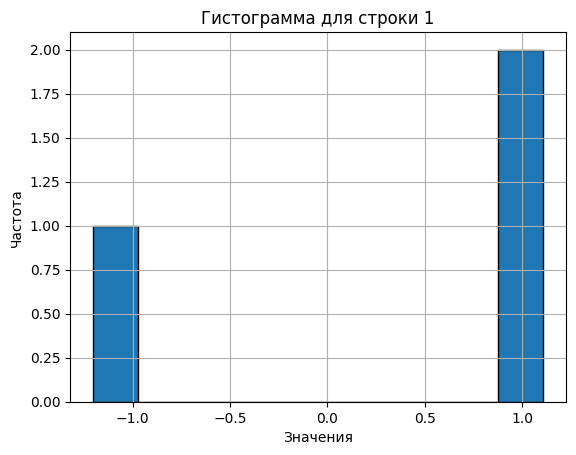

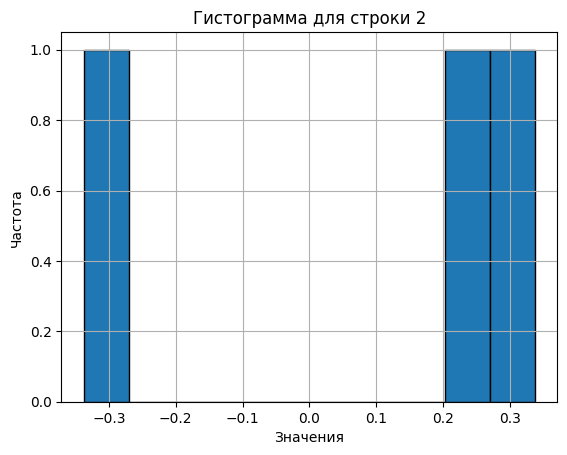

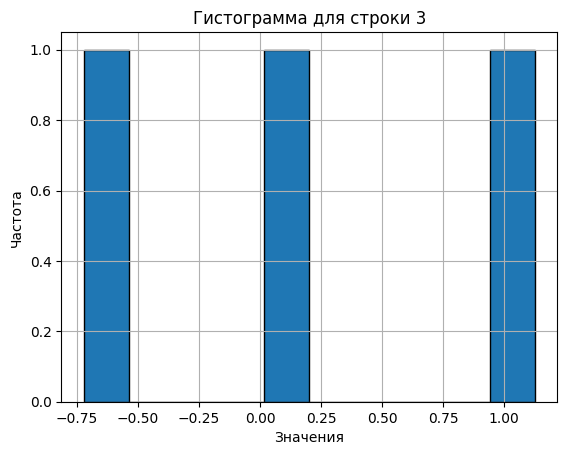

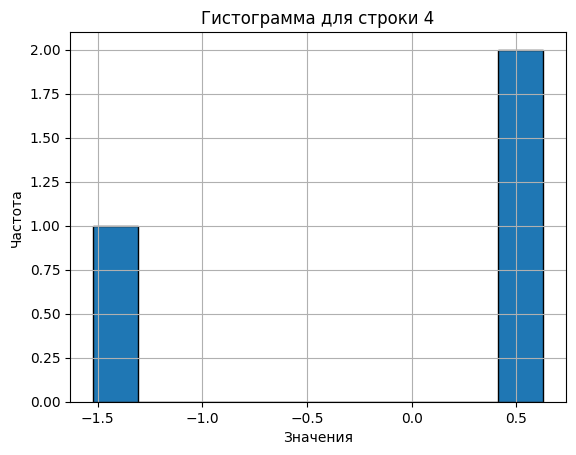

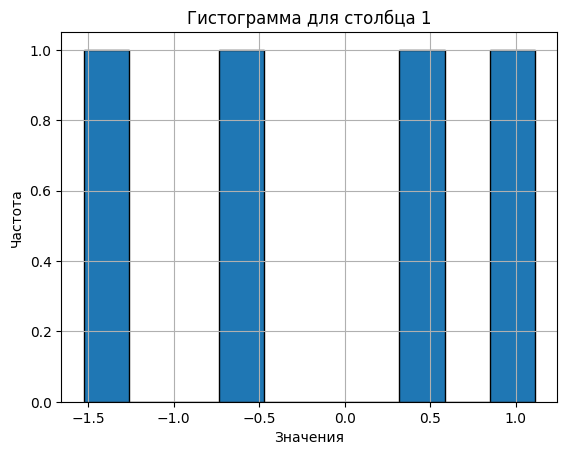

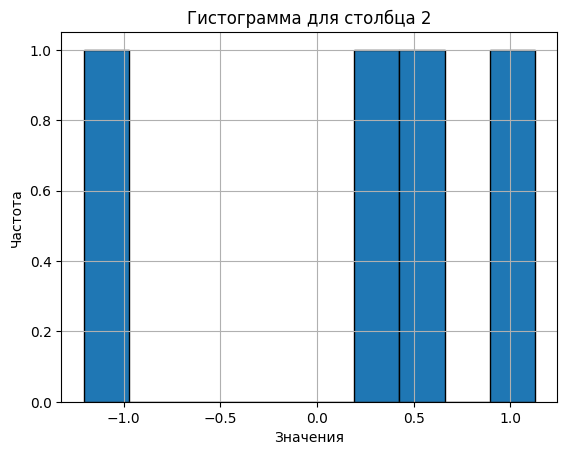

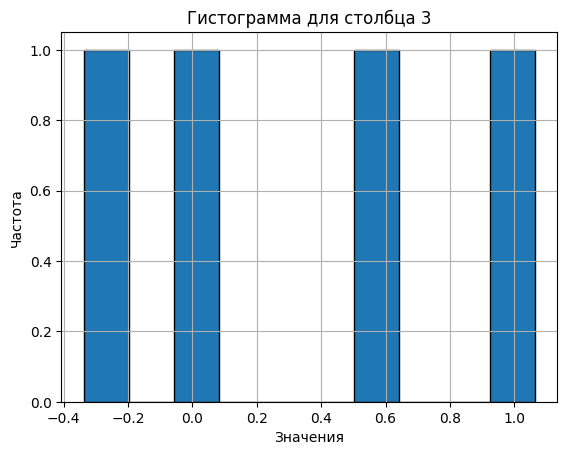

Математическое ожидание для строк: [ 0.3228311   0.07141934  0.15018688 -0.12751133]
Дисперсия для строк: [1.16781818 0.08604804 0.57408107 0.97859639]
Математическое ожидание для столбцов: [-0.19989022  0.19096665  0.32161805]
Дисперсия для столбцов: [1.00830794 0.75372013 0.27411906]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def fill_and_analyze_matrix(rows, cols):
    """
    Функция заполняет матрицу случайными числами, распределёнными по нормальному закону,
    вычисляет математическое ожидание и дисперсию для каждой строки и столбца,
    а также строит гистограмму для каждой строки и столбца.

    rows - количество строк
    cols - количество столбцов
    """
    # Шаг 1: Заполнение матрицы случайными числами (нормальное распределение)
    matrix = np.random.randn(rows, cols)

    # Шаг 2: Вычисление математического ожидания и дисперсии для строк и столбцов
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    # Шаг 3: Построение гистограмм для строк
    for i in range(rows):
        plt.figure()
        plt.hist(matrix[i], bins=10, edgecolor='black')
        plt.title(f"Гистограмма для строки {i + 1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.show()

    # Шаг 4: Построение гистограмм для столбцов
    for j in range(cols):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, edgecolor='black')
        plt.title(f"Гистограмма для столбца {j + 1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.show()

    # Возвращаем результаты (математическое ожидание и дисперсия)
    return {
        'row_means': row_means,
        'row_variances': row_variances,
        'col_means': col_means,
        'col_variances': col_variances
    }

# Пример вызова функции:
result = fill_and_analyze_matrix(4, 3)

# Выводим результаты
print("Математическое ожидание для строк:", result['row_means'])
print("Дисперсия для строк:", result['row_variances'])
print("Математическое ожидание для столбцов:", result['col_means'])
print("Дисперсия для столбцов:", result['col_variances'])


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [10]:
import numpy as np

def chess(m, n, a, b):
    """
    Функция заполняет матрицу размера m x n в шахматном порядке числами a и b.
    
    m - количество строк
    n - количество столбцов
    a, b - значения для шахматного порядка
    """
    # Создаём пустую матрицу размером m x n
    matrix = np.zeros((m, n), dtype=int)
    
    # Заполняем матрицу в шахматном порядке
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    
    return matrix

# Пример вызова функции:
result = chess(4, 4, 1, 0)
print(result)

def test_chess():
    # Тест 1: Стандартная матрица 4x4
    result = chess(4, 4, 1, 0)
    expected = np.array([[1, 0, 1, 0],
                         [0, 1, 0, 1],
                         [1, 0, 1, 0],
                         [0, 1, 0, 1]])
    assert np.array_equal(result, expected), f"Тест 1 не пройден. Результат: {result}"
    
    # Тест 2: Матрица 5x5
    result = chess(5, 5, 1, 0)
    expected = np.array([[1, 0, 1, 0, 1],
                         [0, 1, 0, 1, 0],
                         [1, 0, 1, 0, 1],
                         [0, 1, 0, 1, 0],
                         [1, 0, 1, 0, 1]])
    assert np.array_equal(result, expected), f"Тест 2 не пройден. Результат: {result}"

    # Тест 3: Матрица 1x1
    result = chess(1, 1, 1, 0)
    expected = np.array([[1]])
    assert np.array_equal(result, expected), f"Тест 3 не пройден. Результат: {result}"
    
    # Тест 4: Матрица 2x3
    result = chess(2, 3, 1, 0)
    expected = np.array([[1, 0, 1],
                         [0, 1, 0]])
    assert np.array_equal(result, expected), f"Тест 4 не пройден. Результат: {result}"

    print("Все тесты пройдены")

# Запуск тестов
test_chess()

[[1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]]
Все тесты пройдены


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

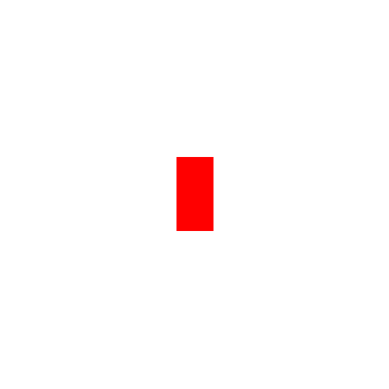

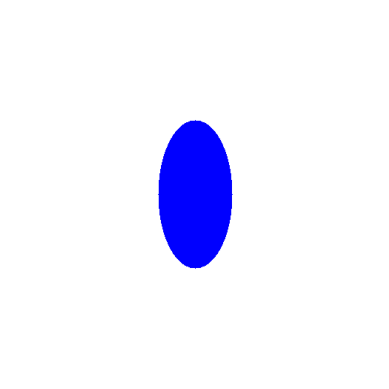

Тест 1: Прямоугольник


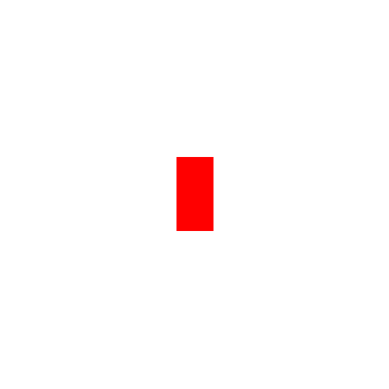

Тест 2: Овал


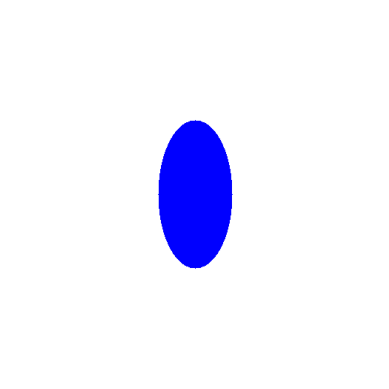

Тест 3: Прямоугольник на черном фоне


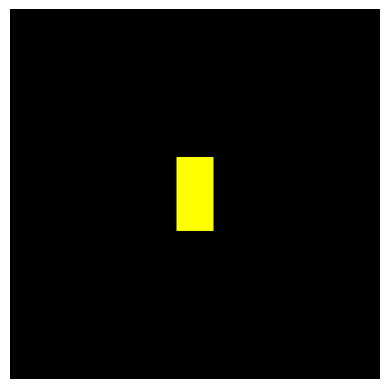

Тест 4: Овал на черном фоне


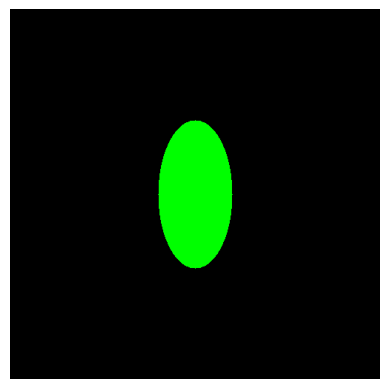

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    """
    Отрисовывает прямоугольник на изображении заданного размера с указанными цветами.
    
    a, b - размеры прямоугольника (длина и ширина)
    m, n - размеры изображения
    rectangle_color - цвет прямоугольника в RGB
    background_color - цвет фона в RGB
    """
    # Создаем изображение с фоном
    img = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    # Начальные координаты верхнего левого угла прямоугольника
    x0, y0 = (m - a) // 2, (n - b) // 2  # Чтобы разместить прямоугольник по центру
    
    # Отображаем прямоугольник
    img[x0:x0+a, y0:y0+b] = rectangle_color
    
    # Показываем изображение
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    """
    Отрисовывает овал на изображении заданного размера с указанными цветами.
    
    a, b - полуоси овала
    m, n - размеры изображения
    ellipse_color - цвет овала в RGB
    background_color - цвет фона в RGB
    """
    # Создаем изображение с фоном
    img = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    # Центр овала
    x_center, y_center = m // 2, n // 2
    
    # Проходим по всем пикселям изображения
    for x in range(m):
        for y in range(n):
            # Уравнение эллипса
            if ((x - x_center)**2 / a**2 + (y - y_center)**2 / b**2) <= 1:
                img[x, y] = ellipse_color
    
    # Показываем изображение
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Пример использования:
draw_rectangle(100, 50, 500, 500, rectangle_color=(255, 0, 0), background_color=(255, 255, 255))
draw_ellipse(100, 50, 500, 500, ellipse_color=(0, 0, 255), background_color=(255, 255, 255))

def test_draw():
    # Тест 1: Прямоугольник на белом фоне
    print("Тест 1: Прямоугольник")
    draw_rectangle(100, 50, 500, 500, rectangle_color=(255, 0, 0), background_color=(255, 255, 255))
    
    # Тест 2: Овал на белом фоне
    print("Тест 2: Овал")
    draw_ellipse(100, 50, 500, 500, ellipse_color=(0, 0, 255), background_color=(255, 255, 255))
    
    # Тест 3: Прямоугольник на черном фоне
    print("Тест 3: Прямоугольник на черном фоне")
    draw_rectangle(100, 50, 500, 500, rectangle_color=(255, 255, 0), background_color=(0, 0, 0))
    
    # Тест 4: Овал на черном фоне
    print("Тест 4: Овал на черном фоне")
    draw_ellipse(100, 50, 500, 500, ellipse_color=(0, 255, 0), background_color=(0, 0, 0))

# Запускаем тесты
test_draw()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: 2.559808015534485
Дисперсия: 2.888469604684967
СКО: 1.699549824125485
Локальные максимумы: [ 3  6  9 11 14 16 18 22 24 26 28 31 37 39 43 45 47 49 51 55 57 59 61 64
 67 70 72 74 79 81 85 89 91 93 95 97]
Локальные минимумы: [ 1  5  7 10 13 15 17 20 23 25 27 30 33 38 42 44 46 48 50 53 56 58 60 63
 66 68 71 73 76 80 83 88 90 92 94 96 98]


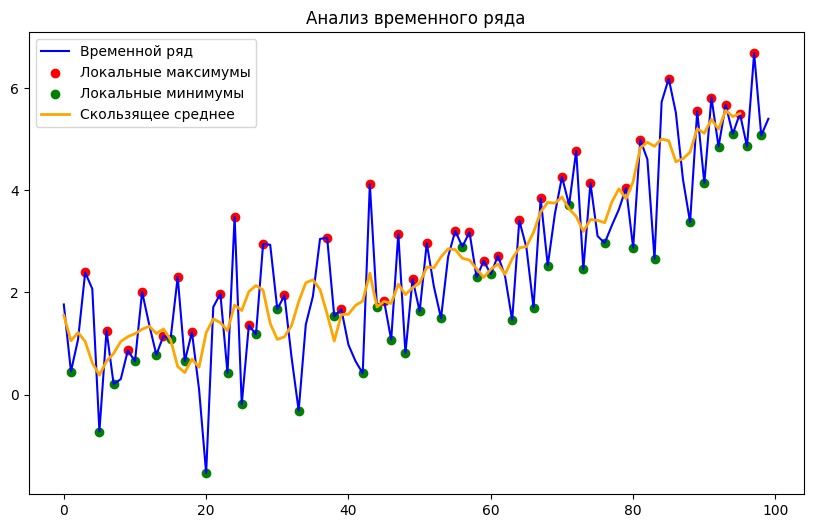

Математическое ожидание: 0.12726988679538953
Дисперсия: 0.6452962552500504
СКО: 0.8033033394988784
Локальные максимумы: [ 3  6  9 12 15 17 20 22 25 27 29 31 34 36 40 47 50 55 59 61 65 67 71 73
 75 78 82 86 89 91 93 96]
Локальные минимумы: [ 1  4  8 10 13 16 19 21 23 26 28 30 33 35 37 44 49 52 56 60 62 66 69 72
 74 77 79 84 88 90 92 95]


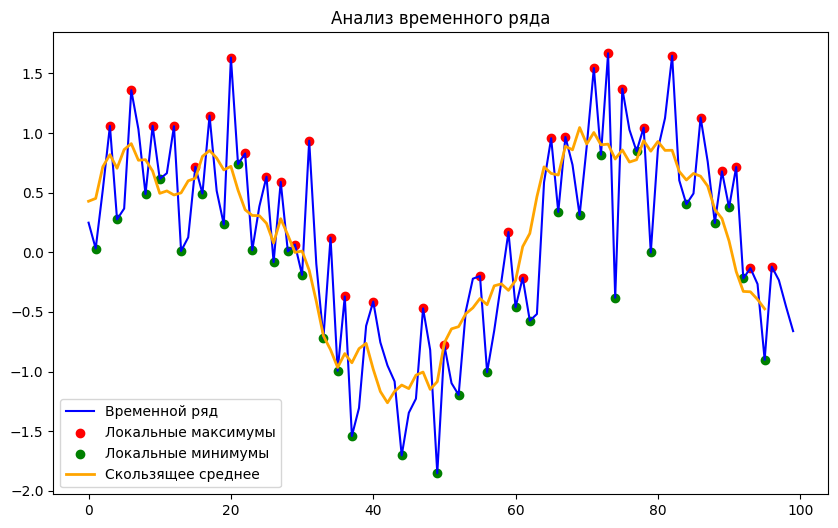

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def time_series_analysis(series, p):
    """
    Функция для анализа временного ряда.
    
    series - временной ряд (numpy array)
    p - размер окна для скользящего среднего
    """
    # 1. Математическое ожидание
    mean = np.mean(series)
    
    # 2. Дисперсия
    variance = np.var(series)
    
    # 3. Среднеквадратическое отклонение (СКО)
    std_dev = np.std(series)
    
    # 4. Локальные максимумы
    local_max = argrelextrema(series, np.greater)[0]
    
    # 5. Локальные минимумы
    local_min = argrelextrema(series, np.less)[0]
    
    # 6. Метод скользящего среднего
    moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')
    
    # Выводим результаты
    print("Математическое ожидание:", mean)
    print("Дисперсия:", variance)
    print("СКО:", std_dev)
    print("Локальные максимумы:", local_max)
    print("Локальные минимумы:", local_min)
    
    return moving_avg, local_max, local_min

def plot_analysis(series, moving_avg, local_max, local_min):
    """
    Функция для визуализации временного ряда и результатов анализа.
    
    series - временной ряд
    moving_avg - скользящее среднее
    local_max - локальные максимумы
    local_min - локальные минимумы
    """
    plt.figure(figsize=(10, 6))
    
    # Визуализируем временной ряд
    plt.plot(series, label='Временной ряд', color='blue')
    
    # Визуализируем локальные максимумы и минимумы
    plt.scatter(local_max, series[local_max], color='red', label='Локальные максимумы')
    plt.scatter(local_min, series[local_min], color='green', label='Локальные минимумы')
    
    # Визуализируем скользящее среднее
    plt.plot(np.arange(len(moving_avg)), moving_avg, label='Скользящее среднее', color='orange', linewidth=2)
    
    plt.legend()
    plt.title('Анализ временного ряда')
    plt.show()

# Пример использования:
# Генерируем случайный временной ряд
np.random.seed(0)
series = np.random.randn(100) + np.linspace(0, 5, 100)

# Размер окна для скользящего среднего
p = 5

# Анализируем временной ряд
moving_avg, local_max, local_min = time_series_analysis(series, p)

# Визуализируем результаты
plot_analysis(series, moving_avg, local_max, local_min)

# Генерируем временной ряд с синусоидой и случайным шумом
np.random.seed(42)
time_series = np.sin(np.linspace(0, 10, 100)) + np.random.randn(100) * 0.5

# Размер окна для скользящего среднего
p = 5

# Анализируем временной ряд
moving_avg, local_max, local_min = time_series_analysis(time_series, p)

# Визуализируем результаты
plot_analysis(time_series, moving_avg, local_max, local_min)


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [15]:
import numpy as np

def one_hot_encoding(labels):
    """
    Функция для выполнения one-hot encoding для вектора меток классов.
    
    labels - вектор меток классов (список или numpy array).
    
    Возвращает:
    - numpy array с one-hot представлением.
    """
    # Находим количество уникальных меток
    num_classes = np.max(labels) + 1  # Максимальная метка + 1 (для 0-based индексации)
    
    # Создаём матрицу one-hot кодирования
    one_hot_matrix = np.eye(num_classes)[labels]
    
    return one_hot_matrix

# Пример использования:
labels = np.array([0, 2, 3, 0])
one_hot = one_hot_encoding(labels)
print(one_hot)

def test_one_hot_encoding():
    # Тест 1: стандартный случай
    labels = np.array([0, 2, 3, 0])
    expected = np.array([[1., 0., 0., 0.],
                         [0., 0., 1., 0.],
                         [0., 0., 0., 1.],
                         [1., 0., 0., 0.]])
    result = one_hot_encoding(labels)
    assert np.array_equal(result, expected), f"Тест 1 не пройден. Результат: {result}"
    
    # Тест 2: все элементы одинаковы
    labels = np.array([1, 1, 1])
    expected = np.array([[0., 1.],
                         [0., 1.],
                         [0., 1.]])
    result = one_hot_encoding(labels)
    assert np.array_equal(result, expected), f"Тест 2 не пройден. Результат: {result}"
    
    # Тест 3: метки от 0 до 4
    labels = np.array([0, 4, 3, 2, 1])
    expected = np.array([[1., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 1.],
                         [0., 0., 0., 1., 0.],
                         [0., 0., 1., 0., 0.],
                         [0., 1., 0., 0., 0.]])
    result = one_hot_encoding(labels)
    assert np.array_equal(result, expected), f"Тест 3 не пройден. Результат: {result}"
    
    print("Все тесты пройдены")

# Запускаем тесты
test_one_hot_encoding()

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
Все тесты пройдены
